# The effects of the Covid 19 in Argentina using Apache Spark: Gini coefficient in 2020.

We download "https://infra.datos.gob.ar/catalog/sspm/dataset/65/distribution/65.1/download/indicadores-distribucion-ingreso-ocupacion-principal-e-ingreso-per-capita-familiar.csv", from "datos.gob.ar", using Pandas library. 
Then we create a dataframe with Pyspark and we filter it to exhibit the 2020 data. Which we show it the graph at the end.

In [4]:
import pandas as pd
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import numpy as np

pdDF = pd.read_csv('https://infra.datos.gob.ar/catalog/sspm/dataset/65/distribution/65.1/download/indicadores-distribucion-ingreso-ocupacion-principal-e-ingreso-per-capita-familiar.csv')

sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

df = spark.createDataFrame(pdDF)

gini2020 = df.select('coeficiente_gini_ipcf').where(col('indice_tiempo').startswith('2020'))

gini2020.show()

+---------------------+
|coeficiente_gini_ipcf|
+---------------------+
|                0.444|
|                0.451|
|  0.44299999999999995|
+---------------------+



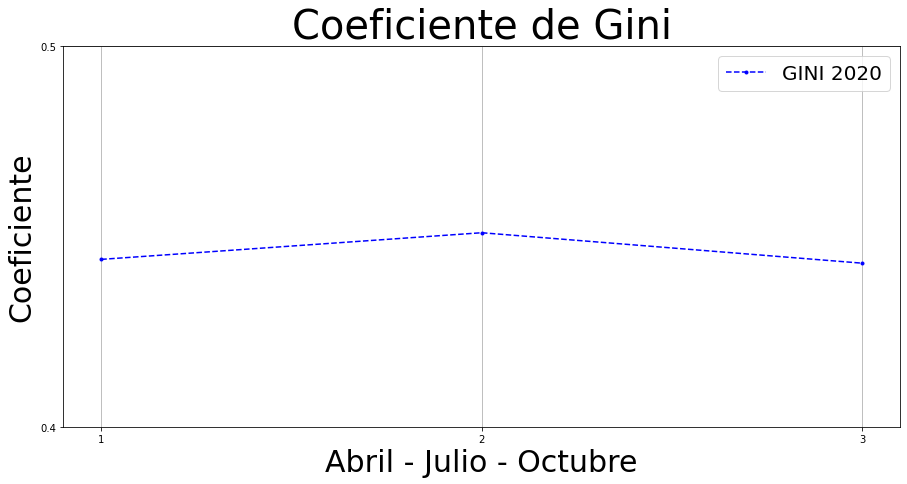

In [10]:
gini_2020 = list()
for line in gini2020.collect():
    line = float(line[0])
    gini_2020.append(line)

x = np.arange(1,4,1)
y = np.arange(0.4, 0.55, 0.1)

plt.plot(x, gini_2020, 'b.--', label= ('GINI 2020'))
plt.title('Coeficiente de Gini', fontdict= {'fontsize':40})
plt.xlabel('Abril - Julio - Octubre', fontdict = {'fontsize':30})
plt.ylabel('Coeficiente', fontdict = {'fontsize':30})
plt.gcf().set_size_inches(15, 7)
plt.xticks(x)
plt.yticks(y)
plt.legend(fontsize=20)
plt.grid()
plt.show()